<h1 align="center">Convex Optimization, Algorithms and Applications</h1>  
<h2 align="center">Homework 3 - David Faget Caño</h2> 

***
> ##### 1. Derive the dual problem of LASSO and format it as a general Quadratic Problem as follows (QP)
>      
> ##### 
\begin{array}{ll}
\text { minimize } & v^T Q v+p^T v \\
\text { subject to } & A v \preceq b
\end{array}

> ##### in variable $v \in \mathbb{R}^n$, where $Q \succeq 0$.

***

We first notice that (LASSO) problem is equivalent to the following:


$$
\begin{array}{ll}
\underset{w,z}{\text{minimize}} & \frac{1}{2}\|z\|_2^2+\lambda\|w\|_1 \\
\text { subject to } &  z=X w-y
\end{array}
$$

As usual, we must now compute the Lagrangian:

$$
L(w, z, \mu) = \frac{1}{2}\|z\|_2^2+\lambda\|w\|_1+\mu^T(z-Xw+y)
$$
Hence, the dual function is:

$$
g(\mu)=\inf _{w, z} L(w, z, \mu)=\inf _z\left(\frac{1}{2}\|z\|_2^2+\mu^T z\right)+\inf _w\left(\lambda\|w\|_1-\mu^T X w\right)+\mu^T y
$$

Let's examine both infimums separately.

Firstly, the infimum in $z$ can be found by using the first order condition $\nabla f(z)=0$, where $f(z)=\frac{1}{2}\|z\|_2^2+\mu^T z$, since we have a convex function on $z$ :

$$
\nabla f(z)=0 \Leftrightarrow z+\mu=0 \Leftrightarrow z=-\mu
$$

In order to find the infimum in $w$, we are going to make use of the result of exercise 2.1 from Homework 2. The conjugate function of $h(x)=\|x\|_1$ is 

$$h^*(y)=\left\{\begin{array}{c}0 \text { if }\|y\|_{\infty} \leq 1, \\ \infty \text { otherwise. }\end{array}\right.$$

We now notice that we have that:

$$
\inf _w\left(\lambda\|w\|_1-\mu^T X w\right)=-\sup_w \left(-\lambda\|w\|_1 + \mu^T X w\right)=\lambda h^*\left(\frac{\mu^T X}{\lambda}\right)
$$

Then,

$$
g(\mu)=-\frac{1}{2} \mu^T \mu+\lambda h^*\left(\frac{\mu^T X}{\lambda}\right)+\mu^T y
$$

And the dual problem is:

$$
\begin{array}{ll}
 \underset{\mu}{\text{maximize}} & \mu^T y-\frac{1}{2} \mu^T \mu \\
 \text { subject to } & \left\|\mu^T X\right\|_{\infty} \leq \lambda
\end{array}
$$

If we multiply the objective function by $-1$, we obtain the following equivalent problem:

$$
\begin{array}{ll}
 \underset{\mu}{\text{minimize}} & \frac{1}{2} \mu^T \mu - \mu^T y \\
 \text { subject to } & \left\|\mu^T X\right\|_{\infty} \leq \lambda
\end{array}
$$

Let's reformulate the constraint as an affine one:

$$
\begin{aligned}
\left\|\mu^T X \right\|_{\infty} \leq \lambda & \Leftrightarrow -\lambda \leq\left[ \mu^T X\right]_i \leq \lambda , \forall i = 1,...,n \\
&  \Leftrightarrow \left[ \mu^T X\right]_i \leq \lambda \text { and }\left[- \mu^T X\right]_i \leq \lambda , \forall i = 1,... n\\
& \Leftrightarrow A \mu \preceq \lambda \mathbb{1}_{2 d}
\end{aligned}
$$
where $A=\left(\begin{array}{c}X^T \\ -X^T\end{array}\right)$. 

Hence, the problem can be written as (QP) as follows:

$$
\begin{array}{ll}
\underset{\mu}{\text{minimize}} & \mu^T Q \mu+p^T \mu \\
 \text { subject to } & A \mu \preceq b
\end{array}
$$

with: $$Q=\frac{1}{2} I_n \succeq 0 $$ $$p=-y$$  $$A=\left(\begin{array}{c}X^T \\ -X^T\end{array}\right)$$ $$b=\lambda \mathbb{1}_{2 d}$$



***
> ##### 2. Implement the barrier method to solve QP
***

First of all, we are going to import the required libraries.

In [1]:
# Import libraries

import matplotlib.pyplot as plt
import numpy as np

Since the problem has not equality constraints, the goal is to solve the following centering problem:
$$ \text{minimize} ~~ t (v^TQv + p^Tv) - \sum_{i=1}^{2d} log(b_i-[Av]_i) $$ 
In order to solve it, we will implement Newton method using backtracking line search.
Hence, we will have to compute the gradient and the Hessian of the function to minimize (let's call it $g$). If we denote by $a_i^T$ the $i$-th row of A, we have:  
$$\begin{gathered}\nabla g(v)=t(2 Q v+p)+\sum_{i=1}^{2 d} (b_i-a_i^T v)^{-1} a_i  \\ \nabla^2 g(v)=2 t Q+\sum_{i=1}^{2 d} (b_i-a_i^T v)^{-2}a_ia_i^T\end{gathered}$$
We are now able to write the requested centering_step function:

In [2]:
def centering_step(Q, p, A, b, t, v0, eps):

    v_seq = [] # We initialize v_seq without v0 because we will append it below.

    # Number of iterations:
    n = 1
    
    while True:
        
    # 1. Compute the Newton step and decrement.

        # First, we compute the gradient:
        # The @ operator computes matrix multiplication
        grad = t*(2*Q@v0 + p) + ((1/(b-A@v0)).T@A).T 
        
        # Second, we compute the Hessian:
        hess = 2*t*Q.T +  (1/(A@v0 -b))**2 * A.T@A
    
        v_seq.append(v0.copy()) # We append a copy of v0
 
        # We need the inverse of the Hessian to obtain the Newton step called 
        # delta (using lectures notation):
        inv_hess = np.linalg.inv(hess)
        delta = - inv_hess @ grad 
        
        # We can now compute the square of Newton decrement, which we call lamb:
        lamb = - np.dot(grad, delta)
    
    # 2. Stopping criterion. 
    
        # If lamb is smaller than eps, we exit:
        if (lamb / 2) <= eps:
            return v_seq
        

    # 3. Choose step size s by backtracking line search.
        
        # Current value of g:
        g_v = t * (np.dot(v0, Q@v0) + np.dot(p,v0)) - np.sum(np.log(b-A@v0))
    
        # Parameters:
        alpha = 0.1
        beta = 0.9
    
        s = 1
        
        while True:
            
            var = v0 + s*delta
            # We introduce this variable to check that the argument of the 
            # log is always > 0:
            inside_log = -A@var+b 
            g_var = g_v
            
            if ((inside_log > 0).sum() == (inside_log).size).astype(int)>0:
                g_var = t * (np.dot(var, Q@var) + np.dot(p, var)) \
                - np.sum(np.log(inside_log))
                
            if g_var <= g_v + alpha * s * np.dot(grad, delta):
                break
                
            s *= beta

    # 4. Update v0.
    
        v0 += s*delta
        n += 1
        



Now, let's proceed to implement the barr_method function. We will adhere to the four barrier method steps as discussed in lectures, which must be repeated until the stopping criterion is met. Notice that the function will also return the precision criterion, in order to use it in question 3.

In [3]:
def barr_method(Q, p, A , b ,v0 , eps):
    
    # We can set, for example, t0 = 1:
    t = 1

    # Number of iterations:
    n = 1
    
    v_seq = []
    prec_criterion = []

    while True:
        
        # 1. Centering step, starting at current v0:
        cent_seq = centering_step(Q, p, A, b, t, v0, eps)
        v_seq.append(cent_seq)
    
        # 2. Update step:
        v0 = cent_seq[-1]
        
        prec_criterion.append(A.shape[0] / t)
        
        # 3. Stopping criterion:
        if prec_criterion[-1] < eps:
            return v_seq, prec_criterion

        # 4. Increase t:
        t *= mu
    
        n +=1

***
> ##### 3. Testing part
***

In this part we have to generate random matrices $X$ of dimensions $n \times d$, as well as observations $y$ of length $n$. The aim is to test our barrier method to solve (QP), so we are going to use what we found in the first question. Here, we set $n=40$ and $d=50$.
We will interpret all the results obtained below.

In [4]:
# Random X and y:
n = 40
d = 50
np.random.seed(0) # We fix random seed in order to always obtain the same results.
X = np.random.rand(n, d)
y = np.random.rand(n)

# We fix epsilon:
eps = 1e-8

# We fix the following variables according to what we found in question 1:
A = np.concatenate([X, -X], axis=1).T
Q = np.eye(n) * 0.5
p = -y
b = 10 * np.ones(2*d) # Lambda = 10

# Initial variable v0:
v0 = np.zeros(n)

# Different values of mu:
mus = [2, 15, 50, 100, 250, 500, 1000]

# We want to plot precision criterion and gap for different values of mu:
prec_criterion = []
gap = []

for mu in mus:
    v_seq, prec = barr_method(Q, p, A, b, v0, eps)
    prec_criterion.append(prec)
    
    # Gap will have len(mus) elements. The length of each element will indicate the 
    # number of total iterations (Newton iterations) required, while each element 
    # values will contain gap values.
    
    v = []
    for out_it in v_seq:
        v.extend([out_it[-1] for out in out_it])
        
    v_opt = v_seq[-1][-1]
    g_opt = np.dot(v_opt, Q@v_opt) + np.dot(p.T, v_opt)
    
    gap.append([np.dot(v, Q@v) + np.dot(p.T, v) - g_opt for v in v[:-1]]) 


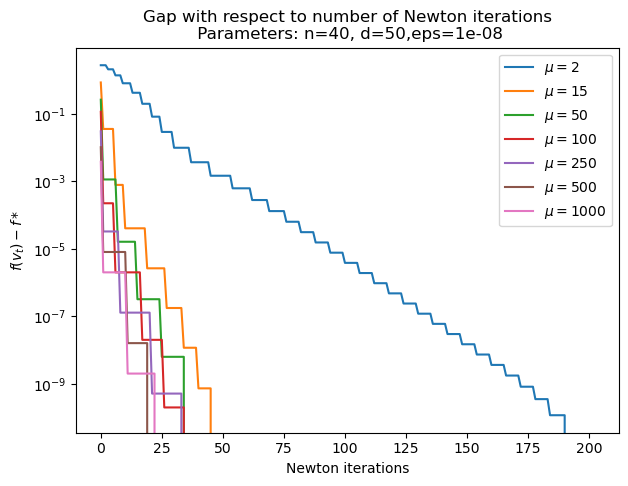

In [5]:
# Gap vs Newton iterations

plt.figure(figsize=[7,5])

for i in gap:
    plt.semilogy(i)
    
plt.legend([f"$\mu = {mu}$" for mu in mus])
plt.xlabel(f"Newton iterations")
plt.ylabel("$f(v_t) - f*$")
plt.title(f"Gap with respect to number of Newton iterations\n Parameters: n={n}, d={d},\
eps={eps}")
plt.show()

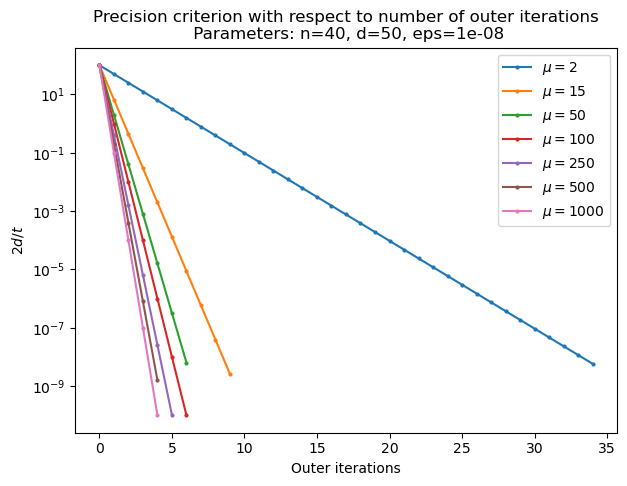

In [6]:
# Precision criterion vs outer iterations

plt.figure(figsize=[7,5])

for i in prec_criterion:
    plt.semilogy(i, marker = "o", markersize = 2)
    
plt.legend([f"$\mu = {mu}$" for mu in mus])
plt.xlabel(f"Outer iterations")
plt.ylabel("$2d/t$")
plt.title(f"Precision criterion with respect to number of outer iterations\n \
Parameters: n={n}, d={d}, eps={eps}")
plt.show()

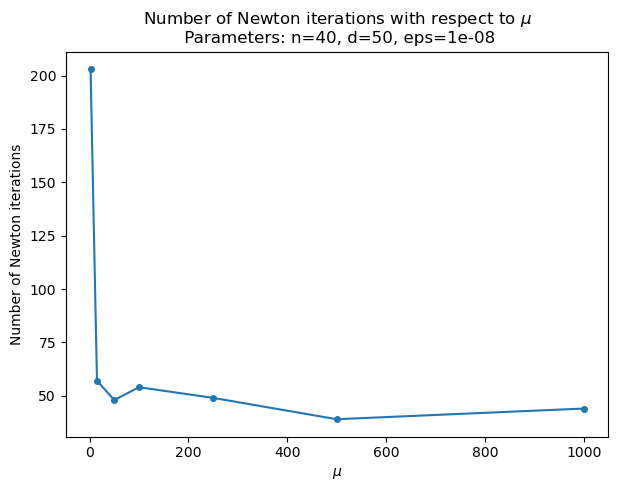

In [7]:
# Newton iterations vs mu values

new_iter = []
for mu in np.arange(0,len(mus)):
    new_iter.append(len(gap[mu]))

plt.figure(figsize=(7,5))
plt.plot(mus, new_iter, marker = 'o', markersize = 4)
plt.xlabel("$\mu$")
plt.ylabel("Number of Newton iterations")
plt.title(f"Number of Newton iterations with respect to $\mu$\n \
Parameters: n={n}, d={d}, eps={eps}")
plt.show()

### Interpretation:

In the first plot we observe the requested gap $f(v_t)-f^*$ in semilog scale with respect to the number of inner (Newton) iterations. This is, in my opinion, more informative than just plotting it with respect to the number of outer iterations, although this would also have presented a staircase shape.
Each "horizontal length of the stair" indicates Newton iterations required for each outer iteration, and we notice that the number of Newton iterations is not always the same on each "stair", even for the same $\mu$. We also notice that the plotted function is always decreasing for each $\mu$, which is consistent with what we expected to have (we saw in class that this gap is less than or equal to $m/t$, so it is obvious that the gap must decrease when $t$ increases). 
Moreover, we see that the gap generally decreases faster when $\mu$ increases, but that the total number of Newton iterations is not very sensitive when $\mu$ becomes great, which is also consistent with what we expected and with what me saw in class.
Finally, looking at the width and depth of the "stairs", we observe the trade-off: large $\mu$ means fewer outer iterations, but more inner iterations.

In the second plot, we observe the precision criterion $2d/t$ ($2d=m$ is the number of constraints, and its division by $t$ is what we compare to $\varepsilon$ to exit barrier method) in semilog scale with respect to the number of outer iterations. We see that the greater is $\mu$, the faster the precision criterion is met in terms of number of outer iterations.

Finally, the last plot shows the number of inner (Newton) iterations with respect to $\mu$. Taking into account this plot and the trade-off mentioned above, we can conclude that an appropriate value of $\mu$ would probably be around $\mu = 15$ or $\mu = 50$.

### Impact of $\mu$ on $w$

So far, we have examined the impact of changing $\mu$ on the number of iterations, but we have not analysed exactly what effect it has on the solution obtained. The most logical hypothesis is that the solution obtained remains virtually the same whatever $\mu$ is, but let's check it. 

In order to do this, we need to compute $w$ from $v$. This is done by considering the KKT conditions. If $z^*$, $w^*$ satisfy KKT conditions, they are optimal.  The first order condition for the gradient of the Lagrangian at $z^*$ sets that $z^*=-v$. From this, we can deduce that $w^*=X^+(y-v^*)$, where $X^+=(X^TX)^{-1}X^T$ is the Moore–Penrose inverse of X. For more information on this reasoning, see Page 248 of *Convex Optimization, S. Boyd and L. Vandenberghe, Cambridge University Press*.

In [8]:
w_opt = []

for mu in mus:
    v_seq , prec = barr_method(Q,p,A,b,v0,eps)
    # We obtain w from v, as seen above:
    w_opt.append(np.linalg.pinv(X)@(y-v_seq[-1][-1])) 
    print(f"For mu={mu}, the estimed w is: \n {w_opt[-1]} ")

For mu=2, the estimed w is: 
 [-1.33246885e-03  4.91312925e-02 -7.95003816e-06 -5.64335063e-03
 -5.23964046e-03  1.05683844e-02 -1.30117728e-03  1.75048985e-03
  4.74241685e-03  1.41813391e-03 -1.18095675e-03  5.86787957e-04
 -7.30469432e-03  9.95703302e-04 -1.36270045e-03  3.53150184e-03
 -5.33222330e-03  7.79960922e-05  5.62830377e-03  1.39896368e-02
  1.58655546e-03  9.95397158e-04  9.54545779e-03 -6.86028726e-03
  1.64467983e-03  2.36289796e-03  3.98747828e-03  1.41301975e-03
  3.02936472e-03  4.66624297e-03 -1.21049923e-03  1.66465728e-04
 -4.11152180e-03 -7.79915102e-03  3.50066827e-03 -1.41369251e-03
  4.61419683e-03 -2.09898260e-03  9.45781331e-04 -6.01104388e-04
  2.63251343e-04  5.58074736e-03  1.88620866e-03 -6.53830008e-03
  5.18887450e-03 -6.06236233e-03  1.23679037e-04 -1.98160373e-03
  2.04475999e-04  3.18502606e-03] 
For mu=15, the estimed w is: 
 [-1.33246895e-03  4.91312929e-02 -7.95000869e-06 -5.64335066e-03
 -5.23964053e-03  1.05683845e-02 -1.30117739e-03  1.7504898

Hence, we observe that the solution is stable at changes of $\mu$, which confirms our initial hypothesis. We also observe that most of the components of $w$ are close to 0. This is because (LASSO) enforces sparsity of the solution (if we had a higher dimensional setting, where $n<<d$, we would observe much more sparsity with values much closer to 0 than in this example).